In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [3]:
# Loading the dataset
data = pd.read_csv("airline.csv")

In [4]:
#  Inspecting the dataset

print("Dataset Preview:")
print(data.head())


Dataset Preview:
    airline_name                            link  \
0  adria-airways  /airline-reviews/adria-airways   
1  adria-airways  /airline-reviews/adria-airways   
2  adria-airways  /airline-reviews/adria-airways   
3  adria-airways  /airline-reviews/adria-airways   
4  adria-airways  /airline-reviews/adria-airways   

                           title        author author_country        date  \
0  Adria Airways customer review         D Ito        Germany  2015-04-10   
1  Adria Airways customer review  Ron Kuhlmann  United States  2015-01-05   
2  Adria Airways customer review       E Albin    Switzerland  2014-09-14   
3  Adria Airways customer review  Tercon Bojan      Singapore  2014-09-06   
4  Adria Airways customer review       L James         Poland  2014-06-16   

                                             content aircraft type_traveller  \
0  Outbound flight FRA/PRN A319. 2 hours 10 min f...      NaN            NaN   
1  Two short hops ZRH-LJU and LJU-VIE. Very fas

In [5]:
#preprocessing the data
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41396 entries, 0 to 41395
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   41396 non-null  object 
 1   link                           41396 non-null  object 
 2   title                          41396 non-null  object 
 3   author                         41396 non-null  object 
 4   author_country                 39805 non-null  object 
 5   date                           41396 non-null  object 
 6   content                        41396 non-null  object 
 7   aircraft                       1278 non-null   object 
 8   type_traveller                 2378 non-null   object 
 9   cabin_flown                    38520 non-null  object 
 10  route                          2341 non-null   object 
 11  overall_rating                 36861 non-null  float64
 12  seat_comfort_rating            3

In [6]:
# Initializing stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [7]:
# Selecting relevant columns
data = data[['recommended', 'content']]

In [8]:
# Handling missing values 
data.dropna(subset=['content', 'recommended'], inplace=True)

In [9]:
# Encoded 'recommended' (target variable)
data['recommended'] = data['recommended'].map({1: 1, 0: 0})  # Binary


In [10]:
# Text vectorization (TF-IDF for 'content')
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english') 
text_features = vectorizer.fit_transform(data['content'])


In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_features, data['recommended'], test_size=0.2, random_state=42)


In [12]:

# Logistic Regression
print("\n--- Training Logistic Regression ---")
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)




--- Training Logistic Regression ---


LogisticRegression(max_iter=1000)

In [13]:
y_pred_logistic = logistic_model.predict(X_test)
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

In [14]:
# SVM Model (Choosen LinearSVC for speed)
print("\n--- Training SVM ---")
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train, y_train)


--- Training SVM ---


LinearSVC(max_iter=10000)

In [15]:
y_pred_svm = svm_model.predict(X_test)
# Using decision function for ROC and AUC 
y_pred_prob_svm = svm_model.decision_function(X_test) # Since LinearSVC does not support predict_proba

In [16]:
# Naive Bayes
print("\n--- Training Naive Bayes ---")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)



--- Training Naive Bayes ---


MultinomialNB()

In [17]:
y_pred_nb = nb_model.predict(X_test)
y_pred_prob_nb = nb_model.predict_proba(X_test)[:, 1]

In [18]:
# Helper function to plot ROC curve
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guessing')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


In [19]:
# -------------------------------------
# Logistic Regression Evaluation
# -------------------------------------

In [20]:
# Training and Testing Accuracy
logistic_train_accuracy = logistic_model.score(X_train, y_train)
logistic_test_accuracy = logistic_model.score(X_test, y_test)
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)

print(f"Training Accuracy: {logistic_train_accuracy:.2f}")
print(f"Testing Accuracy: {logistic_test_accuracy:.2f}")
print(f"\n Overall Accuracy: {logistic_accuracy:.2f}")


Training Accuracy: 0.90
Testing Accuracy: 0.88

 Overall Accuracy: 0.88


In [21]:
# ROC-AUC Score
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Gets probability of positive class
logistic_roc_auc = roc_auc_score(y_test, y_pred_prob_logistic)
print(f"ROC-AUC Score: {logistic_roc_auc:.2f}")


ROC-AUC Score: 0.94


In [22]:
# Classification Report
print("Classification Report of Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))



Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3866
           1       0.88      0.89      0.89      4414

    accuracy                           0.88      8280
   macro avg       0.88      0.88      0.88      8280
weighted avg       0.88      0.88      0.88      8280



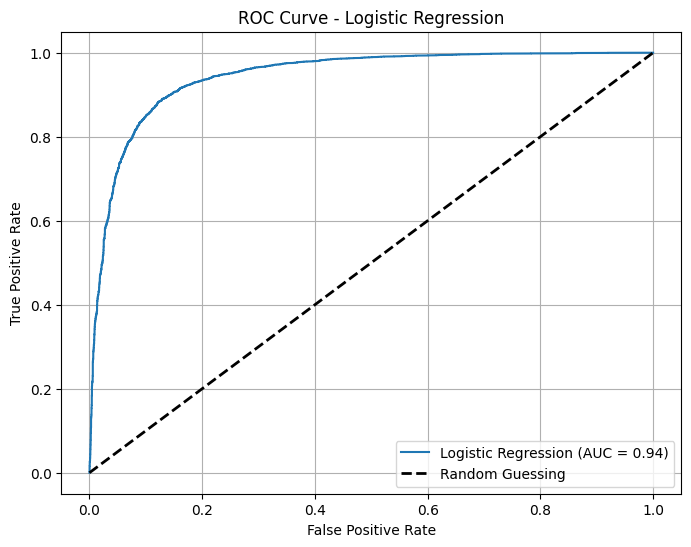

In [23]:
# Plot ROC Curve
plot_roc_curve(y_test, y_pred_prob_logistic, 'Logistic Regression')


In [24]:
# -------------------------------------
# SVM Evaluation
# -------------------------------------

In [25]:
print("\n--- SVM Evaluation ---")

# Training and Testing Accuracy
svm_train_accuracy = svm_model.score(X_train, y_train)
svm_test_accuracy = svm_model.score(X_test, y_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"Training Accuracy: {svm_train_accuracy:.2f}")
print(f"Testing Accuracy: {svm_test_accuracy:.2f}")
print(f"\n Overall Accuracy: {svm_accuracy:.2f}")


--- SVM Evaluation ---
Training Accuracy: 0.92
Testing Accuracy: 0.87

 Overall Accuracy: 0.87


In [26]:
# ROC-AUC Score
# LinearSVC does not provide probability directly; So, using decision_function for ROC
y_pred_prob_svm = svm_model.decision_function(X_test)
svm_roc_auc = roc_auc_score(y_test, y_pred_prob_svm)
print(f"ROC-AUC Score: {svm_roc_auc:.2f}")


ROC-AUC Score: 0.94


In [27]:
# Classification Report
print("Classification Report 0f Linear SVM:")
print(classification_report(y_test, y_pred_svm))


Classification Report 0f Linear SVM:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3866
           1       0.87      0.88      0.88      4414

    accuracy                           0.87      8280
   macro avg       0.87      0.87      0.87      8280
weighted avg       0.87      0.87      0.87      8280



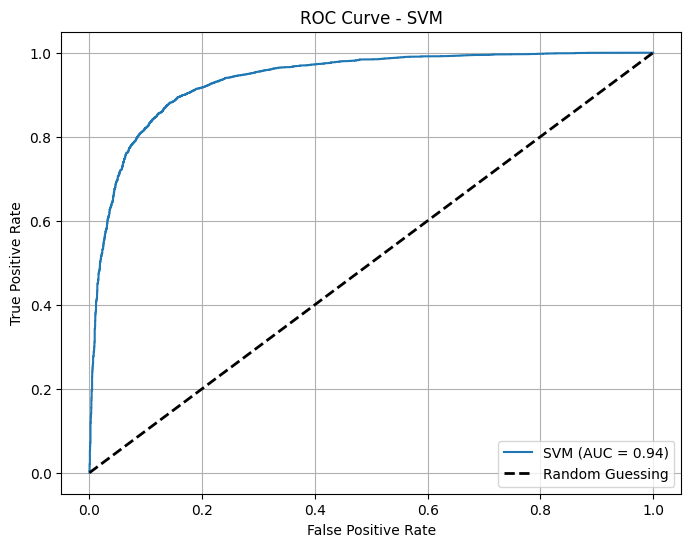

In [28]:
# Plot ROC Curve
plot_roc_curve(y_test, y_pred_prob_svm, 'SVM')


In [29]:
# -------------------------------------
# Naive Bayes Evaluation
# -------------------------------------

In [30]:
print("\n--- Naive Bayes Evaluation ---")

# Training and Testing Accuracy
nb_train_accuracy = nb_model.score(X_train, y_train)
nb_test_accuracy = nb_model.score(X_test, y_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)

print(f"Training Accuracy: {nb_train_accuracy:.2f}")
print(f"Testing Accuracy: {nb_test_accuracy:.2f}")

print(f"\n Overall Accuracy: {nb_accuracy:.2f}")



--- Naive Bayes Evaluation ---
Training Accuracy: 0.84
Testing Accuracy: 0.84

 Overall Accuracy: 0.84


In [31]:
# ROC-AUC Score
y_pred_prob_nb = nb_model.predict_proba(X_test)[:, 1]  # Get probability of positive class
nb_roc_auc = roc_auc_score(y_test, y_pred_prob_nb)
print(f"ROC-AUC Score: {nb_roc_auc:.2f}")


ROC-AUC Score: 0.91


In [32]:

# Classification Report
print("Classification Report of Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


Classification Report of Naive Bayes:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      3866
           1       0.82      0.88      0.85      4414

    accuracy                           0.84      8280
   macro avg       0.84      0.83      0.83      8280
weighted avg       0.84      0.84      0.83      8280



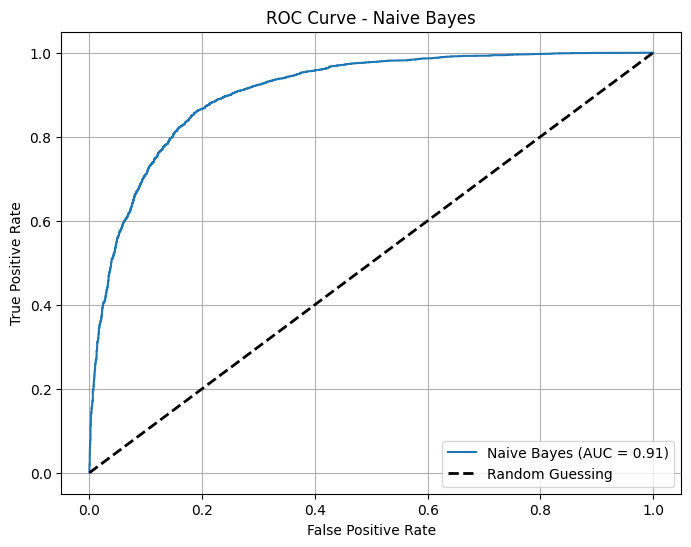

In [33]:
# Plot ROC Curve
plot_roc_curve(y_test, y_pred_prob_nb, 'Naive Bayes')

In [34]:
# Plot confusion matrices for all models
models = ['Logistic Regression', 'SVM', 'Naive Bayes']
confusion_matrices = [
    confusion_matrix(y_test, y_pred_logistic),
    confusion_matrix(y_test, y_pred_svm),
    confusion_matrix(y_test, y_pred_nb)
]

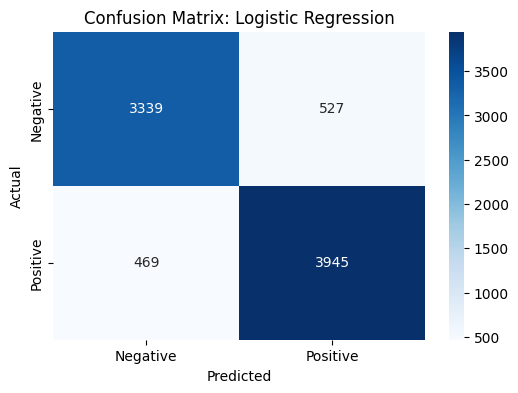

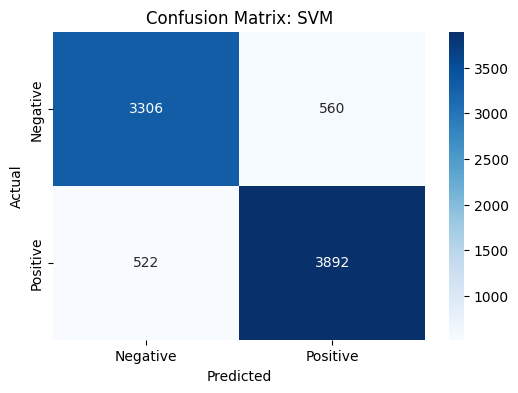

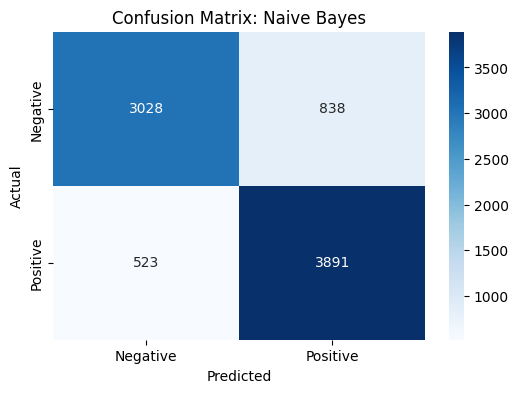

In [35]:
for model_name, cm in zip(models, confusion_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [36]:
# Defined preprocessing function
def preprocess_input(input_text):
    input_text = input_text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = word_tokenize(input_text)  # Tokenize text
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]  
    # Lemmatize and remove stopwords
    return ' '.join(words)



In [37]:
# Example input
input_text = "The flight experience was good and the staff were very friendly."


In [38]:
# Preprocess and transform the input
preprocessed_input = preprocess_input(input_text)
input_tfidf = vectorizer.transform([preprocessed_input])


In [39]:
# Logistic Regression Prediction
logistic_prediction = logistic_model.predict(input_tfidf)
logistic_sentiment = ['Negative', 'Positive'][logistic_prediction[0]]


In [40]:
# SVM Prediction
svm_prediction = svm_model.predict(input_tfidf)
svm_sentiment = ['Negative', 'Positive'][svm_prediction[0]]


In [41]:
# Naive Bayes Prediction
nb_prediction = nb_model.predict(input_tfidf.toarray())
nb_sentiment = ['Negative', 'Positive'][nb_prediction[0]]


In [42]:
print(f"\nLogistic Regression - Sentiment: {logistic_sentiment}")
print(f"SVM - Sentiment: {svm_sentiment}")
print(f"Naive Bayes - Sentiment: {nb_sentiment}")



Logistic Regression - Sentiment: Positive
SVM - Sentiment: Positive
Naive Bayes - Sentiment: Positive


In [43]:
# Combined results into a DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes'],
    'Accuracy': [logistic_accuracy, svm_accuracy, nb_accuracy],
    'ROC-AUC': [logistic_roc_auc, svm_roc_auc, nb_roc_auc]
})

C:\Users\suraj\AppData\Local\Temp\ipykernel_37356\1998328909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


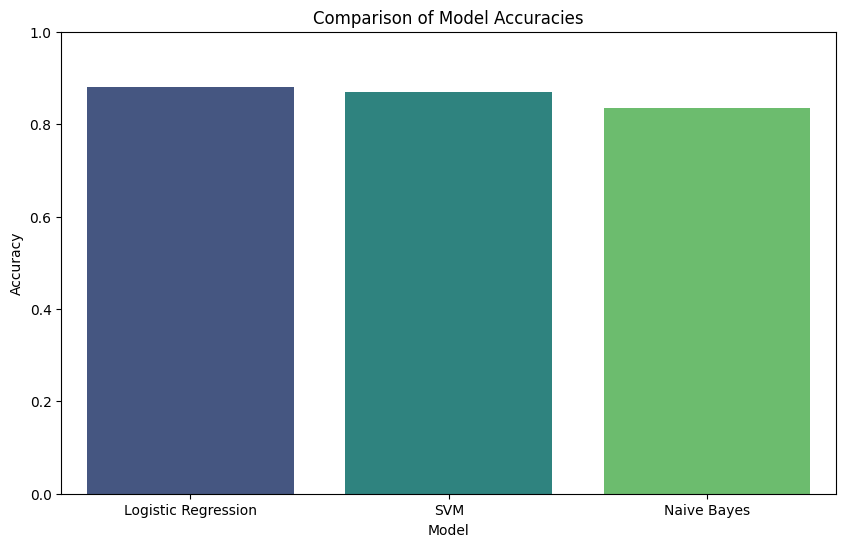

In [44]:
# Bar plot for accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_37356\2502547993.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='ROC-AUC', data=results, palette='viridis')


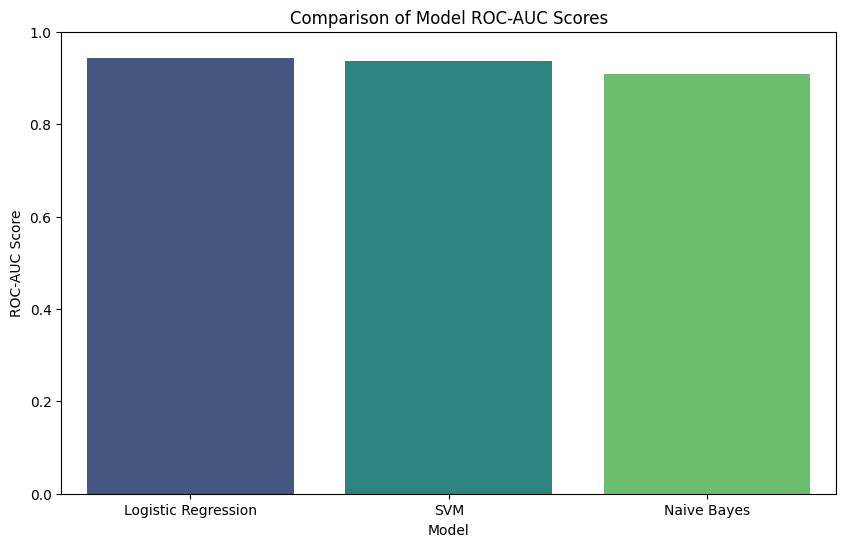

In [45]:
# Bar plot for ROC-AUC comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='ROC-AUC', data=results, palette='viridis')
plt.title('Comparison of Model ROC-AUC Scores')
plt.ylabel('ROC-AUC Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()


In [46]:
# Plot ROC curves 
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_prob_logistic) 
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm) 
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)

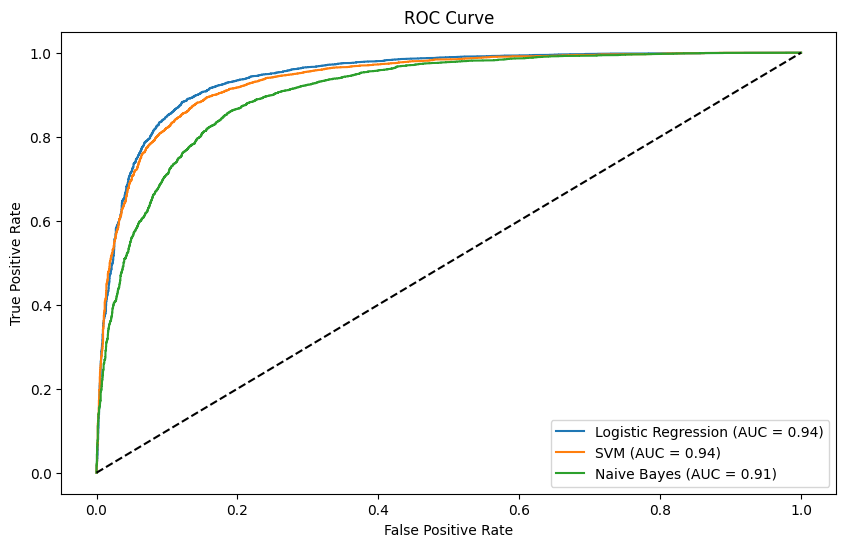

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {logistic_roc_auc:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_roc_auc:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {nb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [48]:
# Visualized sentiment predictions for the input
model_predictions = {
    'Logistic Regression': logistic_sentiment,
    'SVM': svm_sentiment,
    'Naive Bayes': nb_sentiment
}

C:\Users\suraj\AppData\Local\Temp\ipykernel_37356\3419966997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_predictions.keys()), y=[1 if v == 'Positive' else 0 for v in model_predictions.values()], palette='coolwarm')


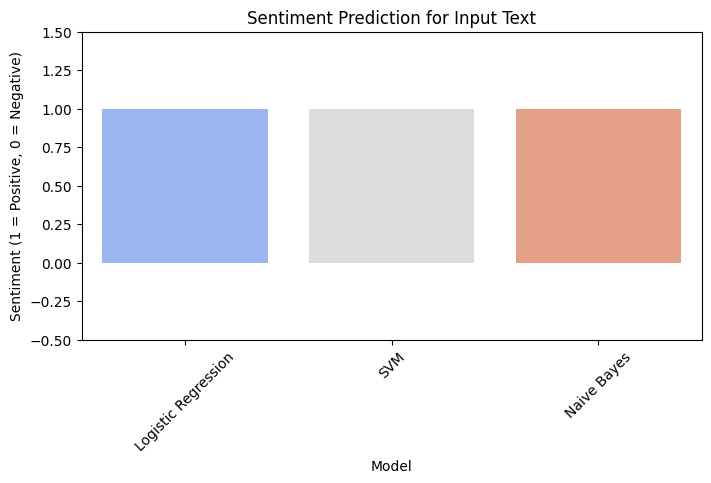

In [49]:
# Displayed the results in a bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=list(model_predictions.keys()), y=[1 if v == 'Positive' else 0 for v in model_predictions.values()], palette='coolwarm')
plt.title("Sentiment Prediction for Input Text")
plt.ylabel("Sentiment (1 = Positive, 0 = Negative)")
plt.xlabel("Model")
plt.ylim(-0.5, 1.5)
plt.xticks(rotation=45)
plt.show()